<a href="https://colab.research.google.com/github/Mohammed-khair/Mood-Classifier-CNN-Keras/blob/main/Mood_classifer_using_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### New Section

# Build a mood identifier using CNN and Tenserflow Keras API

This project was done as an excercise in the following course [Coursera: Convolutional neural network](https://www.coursera.org/learn/convolutional-neural-networks)

In this project we will build a binary classifier that recognizes the mood of a person from a picture of their face.

We will be using Tenserflow Keras API to program the model.

The model architecture will use convolutional neural networks (CNN).

In [ ]:
import math
import random
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops

### Load the Data and Split the Data into Train/Test Sets

In [ ]:
#Load the training set
train_dataset = h5py.File('/content/train_happy.h5', "r")
X_train_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
Y_train_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

#Load the testing set
test_dataset = h5py.File('/content/test_happy.h5', "r")
X_test_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
Y_test_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

#Load the list of classes
classes = np.array(test_dataset["list_classes"][:]) # the list of classes

View 6 examples of the data

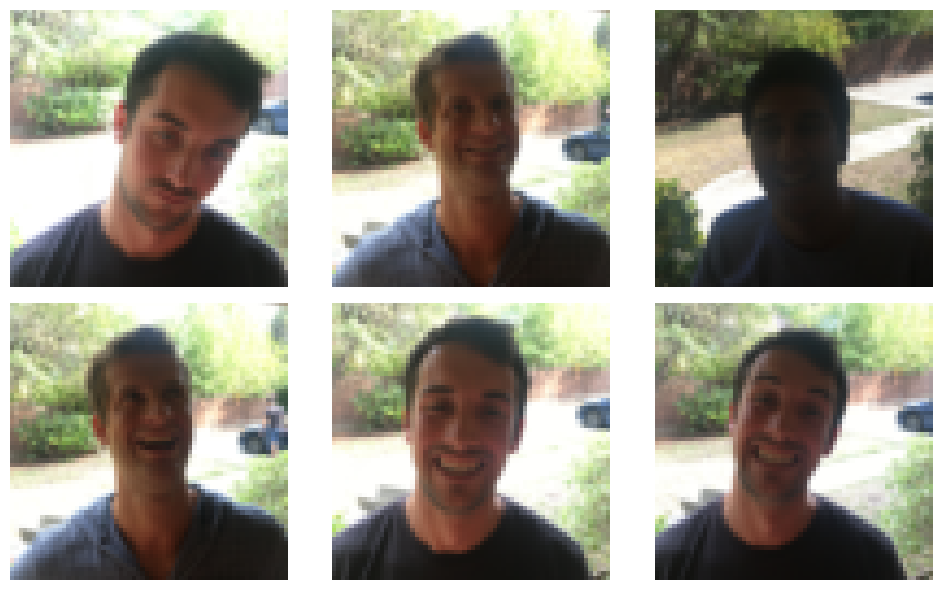

In [ ]:
# Number of images you want to display
num_images_to_display = 6

# Randomly select six images from the list
images_list = X_train_orig[:num_images_to_display]

# Create a subplot grid to display multiple images
rows = 2  # Number of rows in the grid
cols = 3  # Number of columns in the grid

# Create a figure and axes using matplotlib
fig, axes = plt.subplots(rows, cols, figsize=(10, 6))

# Flatten the axes array to iterate through the subplots easily
axes = axes.flatten()

# Loop through the images and display them on the subplots
for i, image_array in enumerate(images_list):
    axes[i].imshow(image_array)
    axes[i].axis('off')  # Turn off axis ticks and labels for cleaner display

# Adjust the layout to avoid overlapping and improve visualization
plt.tight_layout()

# Show the plot with all the images
plt.show()

 Normalize the input image vectors and reshape the output vectors

In [ ]:
# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

Print the shapes of the datasets

In [ ]:
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600,)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150,)


We will use Keras Sequential API to create the model.
The architecture of the model is as follows:
below to build the following model: `ZEROPAD2D -> CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> FLATTEN -> DENSE`

In [ ]:
def happyModel():
    """
    Implements the forward propagation for the binary classification model:
    ZEROPAD2D -> CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> FLATTEN -> DENSE

    Note that for simplicity and grading purposes, you'll hard-code all the values
    such as the stride and kernel (filter) sizes.
    Normally, functions should take these values as function parameters.

    Arguments:
    None

    Returns:
    model -- TF Keras model (object containing the information for the entire training process)
    """
    model = tf.keras.Sequential([
            ## ZeroPadding2D with padding 3, input shape of 64 x 64 x 3
            tfl.ZeroPadding2D(padding=(3, 3), input_shape=(64, 64, 3)),

            ## Conv2D with 32 7x7 filters and stride of 1
            tfl.Conv2D(32, (7, 7), strides=(1, 1)),

            ## BatchNormalization for axis 3
            tfl.BatchNormalization(axis=3),

            ## ReLU
            tfl.ReLU(),

            ## Max Pooling 2D with default parameters
            tfl.MaxPooling2D(),

            ## Flatten layer
            tfl.Flatten(),

            ## Dense layer with 1 unit for output & 'sigmoid' activation
           tfl.Dense(1, activation='sigmoid')

        ])

    return model

In [ ]:
happy_model = happyModel()

Now, we will train the model. We will use ***Adam*** optimizer and the ***binary_crossentropy*** loss.

In [ ]:
happy_model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

In [38]:
happy_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPadding  (None, 70, 70, 3)        0         
 2D)                                                             
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 32)        4736      
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 32)       128       
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                        

## Explaing how the number of parameters where counted

In the convolution neural netowrk the number of parameters are calculated as follows:
(rows of filter &times; columns of filter &times; number of channels of input) &times; number of filter + number of filters
* (7 &times; 7 &times; 3) &times; 32 + 32 = 4, 736


In batch normalization layer the parameters are calculated as follows:
Number of gamma parameters + Number of beta parameters + Number of moving mean parameters + Number of moving variance parameters
* 32 + 32 + 32 + 32 = 128

In the dense layer the number of parameters are calculated as follows:
length of input &times; number of units + number of units
* (32 &times; 32 &times; 32) &times; 1 + 1 = 32,769

## Now we train the model


In [41]:
happy_model.fit(X_train, Y_train, epochs=10, batch_size=16)

Epoch 1/10
38/38 [==============================] - 5s 120ms/step - loss: 0.0676 - accuracy: 0.9700
Epoch 2/10
38/38 [==============================] - 5s 130ms/step - loss: 0.0764 - accuracy: 0.9700
Epoch 3/10
38/38 [==============================] - 5s 136ms/step - loss: 0.0580 - accuracy: 0.9833
Epoch 4/10
38/38 [==============================] - 5s 120ms/step - loss: 0.0543 - accuracy: 0.9833
Epoch 5/10
38/38 [==============================] - 6s 153ms/step - loss: 0.0376 - accuracy: 0.9883
Epoch 6/10
38/38 [==============================] - 4s 117ms/step - loss: 0.0514 - accuracy: 0.9833
Epoch 7/10
38/38 [==============================] - 4s 118ms/step - loss: 0.0418 - accuracy: 0.9867
Epoch 8/10
38/38 [==============================] - 6s 153ms/step - loss: 0.0721 - accuracy: 0.9767
Epoch 9/10
38/38 [==============================] - 4s 117ms/step - loss: 0.1053 - accuracy: 0.9633
Epoch 10/10
38/38 [==============================] - 6s 153ms/step - loss: 0.0439 - accuracy: 0.9917

### Now we evaluate the model on the test set

In [42]:
happy_model.evaluate(X_test, Y_test)

5/5 [==============================] - 0s 65ms/step - loss: 0.0703 - accuracy: 0.9667


[0.07025165855884552, 0.9666666388511658]

# 96% Accuracy!!!